<a href="https://colab.research.google.com/github/divya-r-kamat/case-studies/blob/master/SimpleImputer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mean / median imputation with Scikit-learn ==> SimpleImputer

Scikit-learn provides a class to make most of the most common data imputation techniques.

The **SimpleImputer** class provides basic strategies for imputing missing values, including:

- Mean and median imputation for numerical variables
- Most frequent category imputation for categorical variables
- Arbitrary value imputation for both categorical and numerical variables

### Advantages

- Simple to use if applied to the entire dataframe
- Maintained by the Scikit-learn developers: good quality code
- Fast computation (it uses numpy for calculations)
- Allows for grid search over the various imputation techniques
- Allows for different missing values encodings (you can indicate if the missing values are np.nan, or zeroes, etc)

### Limitations

- Returns a numpy array instead of a pandas dataframe, inconvenient for data analysis
- Needs to use additional classes to select which features to impute  ==>
    - requires more lines of code
    - additional classes still in beta (may change without warning)
    - not so straightforward to use anymore.

### More details about the transformers

- [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer)
- [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)
- [Stackoverflow](https://stackoverflow.com/questions/54160370/how-to-use-sklearn-column-transformer)



In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# these are the objects we need to impute missing data
# with sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# to split the datasets
from sklearn.model_selection import train_test_split

In [ ]:
!cp "/content/drive/My Drive/houseprice.csv" .

# we are going to use only the following variables,
# 3 of which contain NA

use_cols = [
    'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
    'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice'
]

data = pd.read_csv('houseprice.csv', usecols=use_cols)

data.head()

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [ ]:
# let's check the null values
data.isnull().mean()

LotFrontage    0.177397
OverallQual    0.000000
MasVnrArea     0.005479
BsmtUnfSF      0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
GarageYrBlt    0.055479
WoodDeckSF     0.000000
SalePrice      0.000000
dtype: float64

In [ ]:
# let's separate into training and testing set

# first let's remove the target from the features
use_cols.remove('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(data[use_cols], # just the features
                                                    data['SalePrice'], # the target
                                                    test_size=0.3, # the percentage of obs in the test set
                                                    random_state=0) # for reproducibility
X_train.shape, X_test.shape

((1022, 9), (438, 9))

In [ ]:
# let's check the misssing data again
X_train.isnull().mean()

OverallQual    0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
WoodDeckSF     0.000000
BsmtUnfSF      0.000000
LotFrontage    0.184932
MasVnrArea     0.004892
GarageYrBlt    0.052838
dtype: float64

In [ ]:
# Now we impute the missing values with SimpleImputer

# create an instance of the simple imputer
# we indicate that we want to impute with the median
imputer = SimpleImputer(strategy='median')

# we fit the imputer to the train set
# the imputer will learn the median of all variables
imputer.fit(X_train[use_cols])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [ ]:
# we can look at the learnt medians like this:
imputer.statistics_

array([   6. ,  992. , 1095. , 1479. ,    0. ,  486.5,   69. ,    0. ,
       1979. ])

In [ ]:
# and we can investigate the medians directly to corroborate
# the imputer did a good job
X_train[use_cols].median()

OverallQual       6.0
TotalBsmtSF     992.0
1stFlrSF       1095.0
GrLivArea      1479.0
WoodDeckSF        0.0
BsmtUnfSF       486.5
LotFrontage      69.0
MasVnrArea        0.0
GarageYrBlt    1979.0
dtype: float64


Note that SimpleImputer learns the medians of ALL the variables in the dataset, those with NA and those without NA.

In [ ]:
# and now we impute the train and test set

# NOTE: the data is returned as a numpy array!!!
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

X_train

array([[   7., 1057., 1057., ...,   69.,  573., 1998.],
       [   6., 1291., 1291., ...,   69.,    0., 1996.],
       [   5.,  858.,  858., ...,   50.,    0., 1979.],
       ...,
       [   6.,    0., 1318., ...,   68.,    0., 1978.],
       [   7., 1374., 1557., ...,   69.,   18., 2003.],
       [   7., 1195., 1195., ...,   58.,   30., 1998.]])

In [ ]:
# if we wanted to continue our data analysis, we would have to
# encode the train set back to a dataframe:

pd.DataFrame(X_train, columns=use_cols).head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt
0,7.0,1057.0,1057.0,2034.0,576.0,318.0,69.0,573.0,1998.0
1,6.0,1291.0,1291.0,1291.0,307.0,288.0,69.0,0.0,1996.0
2,5.0,858.0,858.0,858.0,117.0,162.0,50.0,0.0,1979.0
3,6.0,560.0,698.0,1258.0,0.0,356.0,60.0,0.0,1939.0
4,2.0,290.0,438.0,438.0,0.0,0.0,60.0,0.0,1930.0


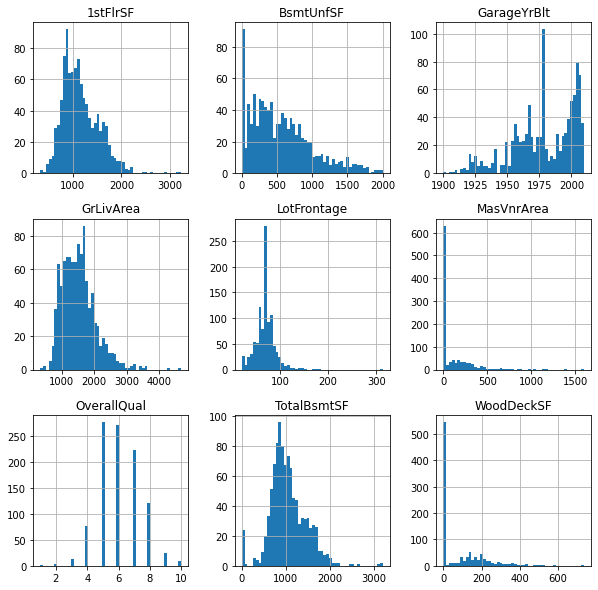

In [ ]:
# Let's explore the change in the distributions after the median imputation

X_train = pd.DataFrame(X_train, columns=use_cols)
X_train.hist(bins=50, figsize=(10,10))
plt.show()

Note in the variable LotFrontAge the tall bar at the value of the median in the histogram, which appears after the data imputation.

**A MASSIVE NOTE OF CAUTION**: when encoding the returned numpy arrays from Scikit-learn back to a dataframe, there is the potential risk of messing the order of the features and therefore MISS-REPRESENTING the data!!

You need to be extremely careful to pass the columns to the pd.DataFrame command in the same order in which they were in the X_train BEFORE the transformation!.


### SimpleImputer: different procedures on different features

On occasions, we want to implement different imputation techniques to different features, how can we do this using the SimpleImputer from Scikit-learn?

We need to use another class called ColumnTransformer. 

**Note** ColumnTransformer has been recently released by Scikit-learn and it is therefore in beta version. This means that the developers can change the way it is used, or remove it altogether any time. The implication is that the code you write today, may not be useful after new releases from Scikit-learn. That is usually what happens with any open-source package when the developers are trying new functionality.

More details about the ColumnTransformer in the [Sklearn website](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)

In [ ]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data[use_cols],# predictors only
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 9), (438, 9))

In [ ]:
# let's look at the missing values
X_train.isnull().mean()

OverallQual    0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
WoodDeckSF     0.000000
BsmtUnfSF      0.000000
LotFrontage    0.184932
MasVnrArea     0.004892
GarageYrBlt    0.052838
dtype: float64

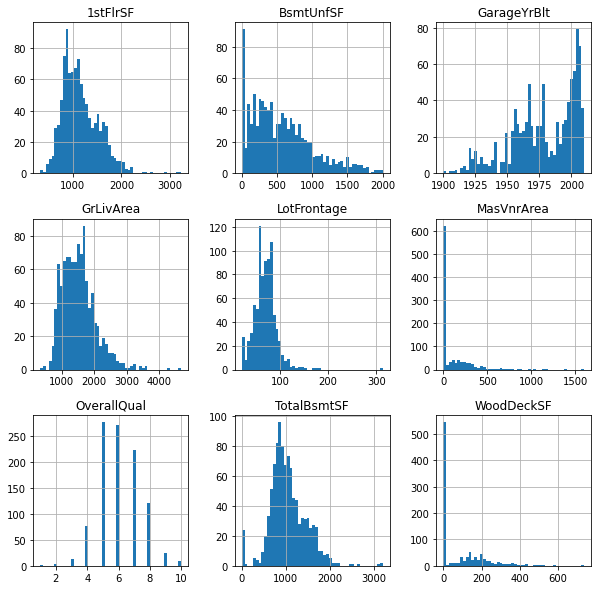

In [ ]:
# let's look at the distributions of the variables to decide
# whether we use the mean or the median

X_train.hist(bins=50, figsize=(10,10))
plt.show()

In [ ]:
# first we need to make lists, indicating which features
# will be imputed with each method

numeric_features_mean = ['LotFrontage']
numeric_features_median = ['MasVnrArea', 'GarageYrBlt']

# then we instantiate the imputers, within a pipeline
# we create one mean imputer and one median imputer
# by changing the parameter in the strategy

numeric_mean_imputer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
])

numeric_median_imputer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
])

# then we put the features list and the transformers together
# using the column transformer

# we need to add remainder = True to indicate what we want
# ALL the columns returned at the end of the transformation
# and not just the engineered ones, which is the default
# behaviour of ColumnTransformer. 

preprocessor = ColumnTransformer(transformers=[
    ('mean_imputer', numeric_mean_imputer, numeric_features_mean),
    ('median_imputer', numeric_median_imputer, numeric_features_median)
], remainder='passthrough')


# parameters of the ColumnTransformer
# remainder = 'passthrough' indicates that we want to retain ALL the columns in the dataset
            # otherwise only those specified in the imputing steps will be kept
    
# for more details follow the sklearn page:
# https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html

In [ ]:
# now we fit the preprocessor
preprocessor.fit(X_train)

ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('mean_imputer',
                                 Pipeline(memory=None,
                                          steps=[('imputer',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='mean',
                                                                verbose=0))],
                                          verbose=False),
                                 ['LotFrontage']),
                                ('median_imputer',
                                 Pipeline(memory=None,
              

In [ ]:
# we can explore the transformers like this:

preprocessor.transformers

[('mean_imputer', Pipeline(memory=None,
           steps=[('imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                 missing_values=nan, strategy='mean',
                                 verbose=0))],
           verbose=False), ['LotFrontage']),
 ('median_imputer', Pipeline(memory=None,
           steps=[('imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                 missing_values=nan, strategy='median',
                                 verbose=0))],
           verbose=False), ['MasVnrArea', 'GarageYrBlt'])]

In [ ]:
# and we can look at the parameters learnt like this:

# for the mean imputer
preprocessor.named_transformers_['mean_imputer'].named_steps['imputer'].statistics_

array([69.66866747])

In [ ]:
# and we can corroborate the value with that one in
# the train set
X_train[numeric_features_mean].mean()

LotFrontage    69.668667
dtype: float64

In [ ]:
# for the median imputerthere are 2 values learnt
# because we want to impute 2 different variables

preprocessor.named_transformers_['median_imputer'].named_steps['imputer'].statistics_

array([   0., 1979.])

In [ ]:
# and we corroborate those values in the train set
X_train[numeric_features_median].median()

MasVnrArea        0.0
GarageYrBlt    1979.0
dtype: float64

In [ ]:
# and now we can impute the data
X_train = preprocessor.transform(X_train)

# and check it worked
np.mean(np.isnan(X_train))

0.0

In [ ]:
# and now we can impute the test data
X_test = preprocessor.transform(X_test)

# and check it worked
np.mean(np.isnan(X_test))

0.0

In [ ]:
# remember that the returned object  is a NumPy array
X_train

array([[  69.66866747,  573.        , 1998.        , ..., 2034.        ,
         576.        ,  318.        ],
       [  69.66866747,    0.        , 1996.        , ..., 1291.        ,
         307.        ,  288.        ],
       [  50.        ,    0.        , 1979.        , ...,  858.        ,
         117.        ,  162.        ],
       ...,
       [  68.        ,    0.        , 1978.        , ..., 1902.        ,
           0.        ,    0.        ],
       [  69.66866747,   18.        , 2003.        , ..., 1557.        ,
         143.        , 1374.        ],
       [  58.        ,   30.        , 1998.        , ..., 1839.        ,
           0.        , 1195.        ]])

In [ ]:
# if we want to put the array back into a dataframe, we need
# to be careful with the column order

# like this, we can explore the features used in each transformer
# including those in the remainder (the ones that were not transformed)
preprocessor.transformers_

[('mean_imputer', Pipeline(memory=None,
           steps=[('imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                 missing_values=nan, strategy='mean',
                                 verbose=0))],
           verbose=False), ['LotFrontage']),
 ('median_imputer', Pipeline(memory=None,
           steps=[('imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                 missing_values=nan, strategy='median',
                                 verbose=0))],
           verbose=False), ['MasVnrArea', 'GarageYrBlt']),
 ('remainder', 'passthrough', [0, 1, 2, 3, 4, 5])]

'remainder', 'passthrough', [0, 1, 2, 3, 4, 5]

the code above tells us that the remainder columns are those in position 0, 1, 2, 3, 4, 5 of the X_train

In [ ]:
# let's capture the columns in a list

remainder_cols = [use_cols[c] for c in [0, 1, 2, 3, 4, 5]]
remainder_cols

['OverallQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'WoodDeckSF',
 'BsmtUnfSF']

In [ ]:
# capture the data back in a dataframe
pd.DataFrame(X_train,
             columns = numeric_features_mean+numeric_features_median+remainder_cols).head()

,LotFrontage,MasVnrArea,GarageYrBlt,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF
0,69.668667,573.0,1998.0,7.0,1057.0,1057.0,2034.0,576.0,318.0
1,69.668667,0.0,1996.0,6.0,1291.0,1291.0,1291.0,307.0,288.0
2,50.000000,0.0,1979.0,5.0,858.0,858.0,858.0,117.0,162.0
3,60.000000,0.0,1939.0,6.0,560.0,698.0,1258.0,0.0,356.0
4,60.000000,0.0,1930.0,2.0,290.0,438.0,438.0,0.0,0.0


ColumnTransformer is in essence just slicing the dataframe in the required features. Then the SimpleImputer operates on the sliced dataframe. If different features are required by the different imputation methods, it will slice the dataframe on the required features for each imputation, and then concatenate them to produce the final output.
For our specific example, what happens is the following:
- ColumnTransformer first creates a single column dataframe with the first feature, LotFrontage
- ColumnTransformer creates a 2 column dataframe with the features MasVnrArea and GarageBlt
- ColumnTransformer creates an additional dataframe with the remaining features in the train set
- The SimpleImputers learn the parameters in their respective sliced dataframes
- ColunmnTransformer contatenates back all the dataframes into the final result

## Arbitrary value imputation with Scikit-learn ==> SimpleImputer

In [ ]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data[use_cols],# predictors only
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 9), (438, 9))

In [ ]:
# Now we impute the missing values with SimpleImputer

# create an instance of the simple imputer
# we indicate that we want to impute with a constant
# arbitrary value: 999
imputer = SimpleImputer(strategy='constant', 
                       fill_value = 999)

# we fit the imputer to the train set
# the imputer assigns 999 to all variables
imputer.fit(X_train)

SimpleImputer(add_indicator=False, copy=True, fill_value=999,
              missing_values=nan, strategy='constant', verbose=0)

For arbitrary value imputation, we need to set the strategy to 'constant' and indicate the arbitrary value in the fill_value argument. 

In [ ]:
# we can look at the learnt imputation values like this:
imputer.statistics_

array([999., 999., 999., 999., 999., 999., 999., 999., 999.])

In [ ]:
# and now we impute the train and test set

# NOTE: the data is returned as a numpy array!!!
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

X_train

array([[   7., 1057., 1057., ...,  999.,  573., 1998.],
       [   6., 1291., 1291., ...,  999.,    0., 1996.],
       [   5.,  858.,  858., ...,   50.,    0.,  999.],
       ...,
       [   6.,    0., 1318., ...,   68.,    0., 1978.],
       [   7., 1374., 1557., ...,  999.,   18., 2003.],
       [   7., 1195., 1195., ...,   58.,   30., 1998.]])

In [ ]:
# we can transform it back to a dataframe:

X_train = pd.DataFrame(X_train, columns=use_cols)
X_train.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt
0,7.0,1057.0,1057.0,2034.0,576.0,318.0,999.0,573.0,1998.0
1,6.0,1291.0,1291.0,1291.0,307.0,288.0,999.0,0.0,1996.0
2,5.0,858.0,858.0,858.0,117.0,162.0,50.0,0.0,999.0
3,6.0,560.0,698.0,1258.0,0.0,356.0,60.0,0.0,1939.0
4,2.0,290.0,438.0,438.0,0.0,0.0,60.0,0.0,1930.0


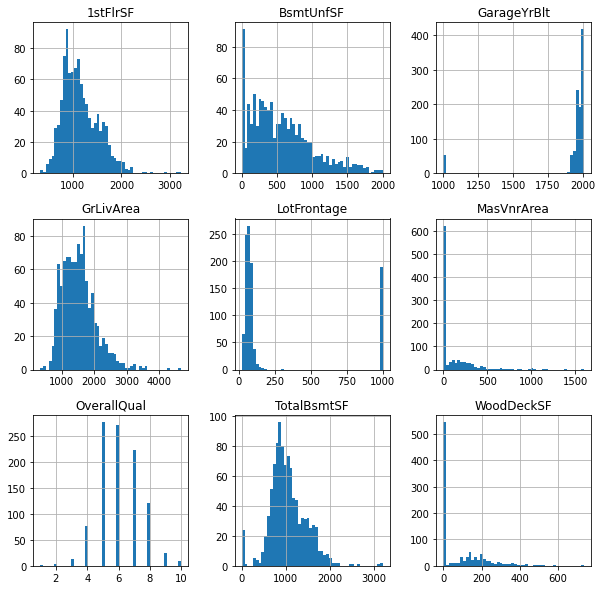

In [ ]:
# Let's explore the distributions after the imputation

X_train.hist(bins=50, figsize=(10,10))
plt.show()

Note the tall bar at 999 in the LotFrontage's histogram, which appeared after the imputation. You can also see the imputation effect on GarageYrBlt, with the bar at the far left right at the 999 value.

In [ ]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data[use_cols],
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 9), (438, 9))

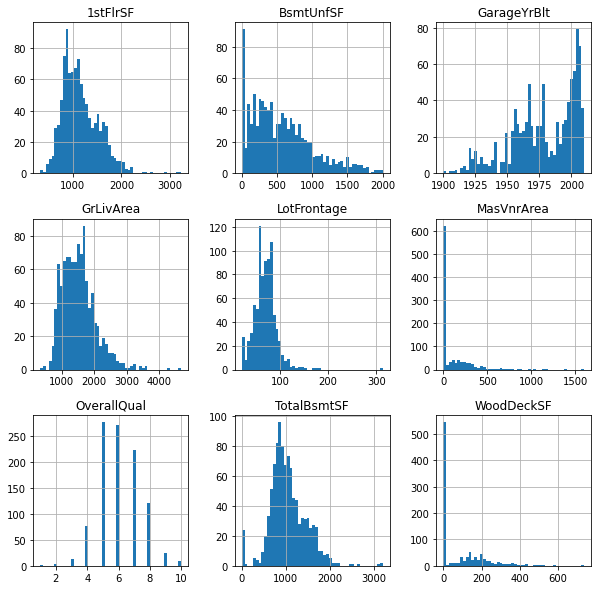

In [ ]:
# let's look at the distributions of the variables to decide
# which arbitrary value to use for each feature

X_train.hist(bins=50, figsize=(10,10))
plt.show()

In [ ]:
# first we need to make lists, indicating which features
# will be imputed with each value

features_LotFrontAge = ['LotFrontage']
features_MasVnrArea = ['MasVnrArea']
features_GarageYrBlt = ['GarageYrBlt']

# then we instantiate the imputers, within a pipeline
# we create one imputer per feature
# within the imputer I indicate the arbitrary value
# which is differet for each variable

imputer_LotFrontAge = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value = 999)),
])

imputer_MasVnrArea = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value = -10)),
])

imputer_GarageYrBlt = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value = 1700)),
])

# then we put the features list and the transformers together
# using the column transformer

# in this example, I will use the default parameter of ColumnTransformer
# remainder = drop, which means that only the imputed features will
# be retained, and the rest dropped

preprocessor = ColumnTransformer(transformers=[
    ('imputer_LotFrontAge', imputer_LotFrontAge, features_LotFrontAge),
    ('imputer_MasVnrArea', imputer_MasVnrArea, features_MasVnrArea),
    ('imputer_GarageYrBlt', imputer_GarageYrBlt, features_GarageYrBlt)
],remainder = 'drop')

In [ ]:
# now we fit the preprocessor
preprocessor.fit(X_train)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('imputer_LotFrontAge',
                                 Pipeline(memory=None,
                                          steps=[('imputer',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=999,
                                                                missing_values=nan,
                                                                strategy='constant',
                                                                verbose=0))],
                                          verbose=False),
                                 ['LotFrontage']),
                                ('imputer_MasVnrArea',
                                 Pipeline(memory=...
         

In [ ]:
# we can explore the transformers like this:

preprocessor.transformers

[('imputer_LotFrontAge', Pipeline(memory=None,
           steps=[('imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=999,
                                 missing_values=nan, strategy='constant',
                                 verbose=0))],
           verbose=False), ['LotFrontage']),
 ('imputer_MasVnrArea', Pipeline(memory=None,
           steps=[('imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=-10,
                                 missing_values=nan, strategy='constant',
                                 verbose=0))],
           verbose=False), ['MasVnrArea']),
 ('imputer_GarageYrBlt', Pipeline(memory=None,
           steps=[('imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=1700,
                                 missing_values=nan, strategy='constant',
                                 verbose=0))],
           verbose=False), ['GarageYrBlt'])]

In [ ]:
# and we can look at the parameters learnt like this:

# for LotFrontAge
preprocessor.named_transformers_['imputer_LotFrontAge'].named_steps['imputer'].statistics_

array([999.])

In [ ]:
# for MasVnrArea

preprocessor.named_transformers_['imputer_MasVnrArea'].named_steps['imputer'].statistics_

array([-10.])

In [ ]:
# for GarageYrBlt

preprocessor.named_transformers_['imputer_GarageYrBlt'].named_steps['imputer'].statistics_

array([1700.])

In [ ]:
# and now we can impute the data
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

X_train

array([[ 999.,  573., 1998.],
       [ 999.,    0., 1996.],
       [  50.,    0., 1700.],
       ...,
       [  68.,    0., 1978.],
       [ 999.,   18., 2003.],
       [  58.,   30., 1998.]])


Observe how the returned data contains only 3 variables, the ones for which we specified imputation values. This is the effect of specifying remainder='drop' in the columnTransformer.

For our specific example, what happens is the following:

- ColumnTransformer first creates 3 single column dataframes, one with each of the indicated variables
- The SimpleImputers learn the parameters in their respective sliced dataframes
    - In this case they don't learn anything, because we hard code the arbitrary value
- ColunmnTransformer contatenates back the 3 single column dataframes into the final result, which is a 3 column dataframe

So note that you will not get all the variables from the original X_train, unless you create imputers for all the variables!!

Also, there is a risk of messing up with the order of the features, if we do not use the transformers within a pipeline or we do not keep an eye on the order of the features in the train set, before they were converted to numpy arrays.

In [ ]:
# see how the result of the imputation is a 3 column dataset
pd.DataFrame(X_train,
             columns=features_LotFrontAge + features_MasVnrArea +
             features_GarageYrBlt).head()

,LotFrontage,MasVnrArea,GarageYrBlt
0,999.0,573.0,1998.0
1,999.0,0.0,1996.0
2,50.0,0.0,1700.0
3,60.0,0.0,1939.0
4,60.0,0.0,1930.0


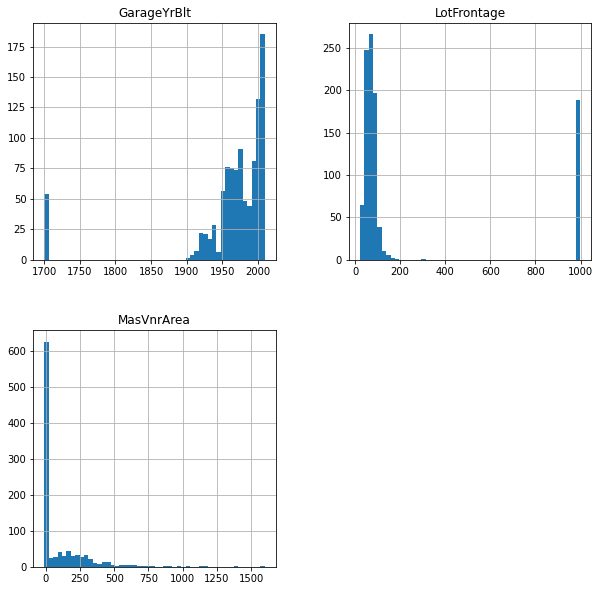

In [ ]:
X_train = pd.DataFrame(X_train,
             columns=features_LotFrontAge + features_MasVnrArea +
             features_GarageYrBlt)

X_train.hist(bins=50, figsize=(10,10))
plt.show()

Note the bars corresponding to the arbitrary values at 1700, 999 and -1 for each feature

## Frequent category imputation with Scikit-learn ==> SimpleImputer


In [ ]:
# we use only the following variables for the demo:
# a mix of categorical and numerical

cols_to_use = ['BsmtQual', 'FireplaceQu', 'MSZoning',
               'BsmtUnfSF', 'LotFrontage', 'MasVnrArea',
               'Street', 'Alley', 'SalePrice']


data = pd.read_csv('houseprice.csv', usecols=cols_to_use)

data.head()

,MSZoning,LotFrontage,Street,Alley,MasVnrArea,BsmtQual,BsmtUnfSF,FireplaceQu,SalePrice
0,RL,65.0,Pave,NaN,196.0,Gd,150,NaN,208500
1,RL,80.0,Pave,NaN,0.0,Gd,284,TA,181500
2,RL,68.0,Pave,NaN,162.0,Gd,434,TA,223500
3,RL,60.0,Pave,NaN,0.0,TA,540,Gd,140000
4,RL,84.0,Pave,NaN,350.0,Gd,490,TA,250000


In [ ]:
# let's check the null values
data.isnull().mean()

MSZoning       0.000000
LotFrontage    0.177397
Street         0.000000
Alley          0.937671
MasVnrArea     0.005479
BsmtQual       0.025342
BsmtUnfSF      0.000000
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

In [ ]:
# let's separate into training and testing set

# first let's remove the target from the features
cols_to_use.remove('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use], # just the features
                                                    data['SalePrice'], # the target
                                                    test_size=0.3, # the percentage of obs in the test set
                                                    random_state=0) # for reproducibility
X_train.shape, X_test.shape

((1022, 8), (438, 8))

In [ ]:
# let's check the misssing data again
X_train.isnull().mean()

BsmtQual       0.023483
FireplaceQu    0.467710
MSZoning       0.000000
BsmtUnfSF      0.000000
LotFrontage    0.184932
MasVnrArea     0.004892
Street         0.000000
Alley          0.939335
dtype: float64

In [ ]:
# Now we impute the missing values with SimpleImputer

# create an instance of the simple imputer
# we indicate that we want to impute with the 
# most frequent category

imputer = SimpleImputer(strategy='most_frequent')

# we fit the imputer to the train set
# the imputer will learn the mode of ALL variables
# categorical or not
imputer.fit(X_train[cols_to_use])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [ ]:
# we can look at the learnt frequent values like this:
imputer.statistics_

array(['TA', 'Gd', 'RL', 0, 60.0, 0.0, 'Pave', 'Pave'], dtype=object)

In [ ]:
# and we can investigate the frequent values to corroborate
# the imputer did a good job
X_train[cols_to_use].mode()

,BsmtQual,FireplaceQu,MSZoning,BsmtUnfSF,LotFrontage,MasVnrArea,Street,Alley
0,TA,Gd,RL,0,60.0,0.0,Pave,Pave


In [ ]:
# and now we impute the train and test set

# NOTE: the data is returned as a numpy array!!!
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

X_train

array([['Gd', 'Gd', 'RL', ..., 573.0, 'Pave', 'Pave'],
       ['Gd', 'Gd', 'RL', ..., 0.0, 'Pave', 'Pave'],
       ['TA', 'Gd', 'RL', ..., 0.0, 'Pave', 'Pave'],
       ...,
       ['TA', 'Gd', 'RM', ..., 0.0, 'Pave', 'Pave'],
       ['Gd', 'TA', 'RL', ..., 18.0, 'Pave', 'Pave'],
       ['Gd', 'Gd', 'RL', ..., 30.0, 'Pave', 'Pave']], dtype=object)

In [ ]:
# encode the train set back to a dataframe:

pd.DataFrame(X_train, columns=cols_to_use).head()

,BsmtQual,FireplaceQu,MSZoning,BsmtUnfSF,LotFrontage,MasVnrArea,Street,Alley
0,Gd,Gd,RL,318,60,573,Pave,Pave
1,Gd,Gd,RL,288,60,0,Pave,Pave
2,TA,Gd,RL,162,50,0,Pave,Pave
3,TA,Gd,RL,356,60,0,Pave,Pave
4,TA,Gd,RL,0,60,0,Pave,Pave


### SimpleImputer: different procedures on different features

In [ ]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use],
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 8), (438, 8))

In [ ]:
# let's look at the missing values
X_train.isnull().mean()

BsmtQual       0.023483
FireplaceQu    0.467710
MSZoning       0.000000
BsmtUnfSF      0.000000
LotFrontage    0.184932
MasVnrArea     0.004892
Street         0.000000
Alley          0.939335
dtype: float64

In [ ]:
# first we need to make lists, indicating which features
# will be imputed with each method

features_numeric = ['BsmtUnfSF', 'LotFrontage', 'MasVnrArea', ]
features_categoric = ['BsmtQual', 'FireplaceQu', 'MSZoning',
                      'Street', 'Alley']

# then we instantiate the imputers, within a pipeline
# we create one mean imputer and one frequent category imputer
# by changing the parameter in the strategy

numeric_imputer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
])

categoric_imputer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
])

# then we put the features list and the transformers together
# using the column transformer

preprocessor = ColumnTransformer(transformers=[
    ('numeric_imputer', numeric_imputer, features_numeric),
    ('categoric_imputer', categoric_imputer, features_categoric)
])

In [ ]:
# now we fit the preprocessor
preprocessor.fit(X_train)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('numeric_imputer',
                                 Pipeline(memory=None,
                                          steps=[('imputer',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='mean',
                                                                verbose=0))],
                                          verbose=False),
                                 ['BsmtUnfSF', 'LotFrontage', 'MasVnrArea']),
                                ('categoric_imputer',
                                 Pipeline(m

In [ ]:
# we can explore the transformers like this:

preprocessor.transformers

[('numeric_imputer', Pipeline(memory=None,
           steps=[('imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                 missing_values=nan, strategy='mean',
                                 verbose=0))],
           verbose=False), ['BsmtUnfSF', 'LotFrontage', 'MasVnrArea']),
 ('categoric_imputer', Pipeline(memory=None,
           steps=[('imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                 missing_values=nan, strategy='most_frequent',
                                 verbose=0))],
           verbose=False), ['BsmtQual',
   'FireplaceQu',
   'MSZoning',
   'Street',
   'Alley'])]

In [ ]:
# and we can look at the parameters learnt like this:

# for the mean imputer
preprocessor.named_transformers_['numeric_imputer'].named_steps['imputer'].statistics_

array([565.99217221,  69.66866747, 103.55358899])

In [ ]:
# and we can corroborate the value with that one in
# the train set
X_train[features_numeric].mean()

BsmtUnfSF      565.992172
LotFrontage     69.668667
MasVnrArea     103.553589
dtype: float64

In [ ]:
# for frequent category imputer

preprocessor.named_transformers_['categoric_imputer'].named_steps['imputer'].statistics_

array(['TA', 'Gd', 'RL', 'Pave', 'Pave'], dtype=object)

In [ ]:
# and we corroborate those values in the train set

X_train[features_categoric].mode()

,BsmtQual,FireplaceQu,MSZoning,Street,Alley
0,TA,Gd,RL,Pave,Pave


In [ ]:
# and now we can impute the data
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

In [ ]:
X_train.shape

(1022, 8)

In [ ]:
# see how the result of the imputation is a 3 column dataset
pd.DataFrame(X_train,
             columns=features_numeric + features_categoric).head()

,BsmtUnfSF,LotFrontage,MasVnrArea,BsmtQual,FireplaceQu,MSZoning,Street,Alley
0,318,69.6687,573,Gd,Gd,RL,Pave,Pave
1,288,69.6687,0,Gd,Gd,RL,Pave,Pave
2,162,50,0,TA,Gd,RL,Pave,Pave
3,356,60,0,TA,Gd,RL,Pave,Pave
4,0,60,0,TA,Gd,RL,Pave,Pave


In this case, we passed all the features available in the dataset to the missing data imputers, so the returned dataset contains all the variables.

## Missing Category imputation with Scikit-learn: SimpleImputer

In [ ]:
# let's load the dataset with a few categorical columns

# these are categorical columns and the target SalePrice
cols_to_use = ['BsmtQual', 'FireplaceQu', 'SalePrice']

data = pd.read_csv('houseprice.csv', usecols=cols_to_use)
data.head()

,BsmtQual,FireplaceQu,SalePrice
0,Gd,NaN,208500
1,Gd,TA,181500
2,Gd,TA,223500
3,TA,Gd,140000
4,Gd,TA,250000


In [ ]:
# let's inspect the percentage of missing values in each variable

data.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

In [ ]:
# let's separate into training and testing set

# first let's remove the target from the features
cols_to_use.remove('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(
    data[cols_to_use],  # just the features
    data['SalePrice'],  # the target
    test_size=0.3,  # the percentage of obs in the test set
    random_state=0)  # for reproducibility

X_train.shape, X_test.shape

((1022, 2), (438, 2))

In [ ]:
# let's check the misssing data again
X_train.isnull().mean()

BsmtQual       0.023483
FireplaceQu    0.467710
dtype: float64

In [ ]:
# let's inspect the values of the categorical variable
X_train['BsmtQual'].unique()

array(['Gd', 'TA', 'Fa', nan, 'Ex'], dtype=object)

In [ ]:
# let's inspect the values of the categorical variable
X_train['FireplaceQu'].unique()

array([nan, 'Gd', 'TA', 'Fa', 'Po', 'Ex'], dtype=object)

In [ ]:
# Now we impute the missing values with SimpleImputer

# create an instance of the simple imputer
# we indicate that we want to impute by replacing NA
# with 'Missing'

imputer = SimpleImputer(strategy='constant', 
                       fill_value = 'Missing')

# we fit the imputer to the train set
# the imputer will learn the median of all variables
imputer.fit(X_train)

SimpleImputer(add_indicator=False, copy=True, fill_value='Missing',
              missing_values=nan, strategy='constant', verbose=0)

In [ ]:
# we can look at the learnt modes like this:
imputer.statistics_

array(['Missing', 'Missing'], dtype=object)

In [ ]:
# and now we impute the train and test set

# NOTE: the data is returned as a numpy array!!!
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

X_train

array([['Gd', 'Missing'],
       ['Gd', 'Gd'],
       ['TA', 'Missing'],
       ...,
       ['Missing', 'Missing'],
       ['Gd', 'TA'],
       ['Gd', 'Missing']], dtype=object)

In [ ]:
# encode the train set back to a dataframe:

X_train = pd.DataFrame(X_train, columns=cols_to_use)
X_train.head()

,BsmtQual,FireplaceQu
0,Gd,Missing
1,Gd,Gd
2,TA,Missing
3,TA,Missing
4,TA,Missing


In [ ]:
X_train['BsmtQual'].unique()

array(['Gd', 'TA', 'Fa', 'Missing', 'Ex'], dtype=object)

In [ ]:
X_train.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
dtype: float64

Note that when using SimpleImputer and setting the parameters to:
- strategy='constant'
- fill_value = 'Missing'

If your dataframe contains variables that are numerical and categorical, NA in both will be replaced by 'Missing" therefore converting your numerical variables into categorical, which is probably not what you are after.

Most datasets contain both numerical and categorical variables, so very likely you will have to use a column transformer as shown in previous notebooks and as I also show below again.

In [ ]:
# let's load the dataset with both numerical and categorical variables

cols_to_use = [
    'BsmtQual', 'FireplaceQu', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt',
    'SalePrice'
]

data = pd.read_csv('houseprice.csv', usecols=cols_to_use)
data.head()

,LotFrontage,MasVnrArea,BsmtQual,FireplaceQu,GarageYrBlt,SalePrice
0,65.0,196.0,Gd,NaN,2003.0,208500
1,80.0,0.0,Gd,TA,1976.0,181500
2,68.0,162.0,Gd,TA,2001.0,223500
3,60.0,0.0,TA,Gd,1998.0,140000
4,84.0,350.0,Gd,TA,2000.0,250000


In [ ]:
# let's separate into training and testing set

# first drop the target from the feature list
cols_to_use.remove('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use],
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 5), (438, 5))

In [ ]:
# let's look at the missing values

X_train.isnull().mean()

BsmtQual       0.023483
FireplaceQu    0.467710
LotFrontage    0.184932
MasVnrArea     0.004892
GarageYrBlt    0.052838
dtype: float64

In [ ]:
# first we need to make lists, indicating which features
# will be imputed with each method

features_numeric = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
features_categoric = ['BsmtQual', 'FireplaceQu']

# then we instantiate the imputers, within a pipeline
# we create one imputer for numerical and one imputer
# for categorical

imputer_numeric = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
])

imputer_categoric = Pipeline(
    steps=[('imputer',
            SimpleImputer(strategy='constant', fill_value='Missing'))])

# then we put the features list and the transformers together
# using the column transformer

preprocessor = ColumnTransformer(transformers=[('imputer_numeric',
                                                imputer_numeric,
                                                features_numeric),
                                               ('imputer_categoric',
                                                imputer_categoric,
                                                features_categoric)])

In [ ]:
# now we fit the preprocessor
preprocessor.fit(X_train)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('imputer_numeric',
                                 Pipeline(memory=None,
                                          steps=[('imputer',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='mean',
                                                                verbose=0))],
                                          verbose=False),
                                 ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']),
                                ('imputer_categoric',
                                 Pipeline

In [ ]:
# we can explore the transformers like this:
preprocessor.transformers

[('imputer_numeric', Pipeline(memory=None,
           steps=[('imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                 missing_values=nan, strategy='mean',
                                 verbose=0))],
           verbose=False), ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']),
 ('imputer_categoric', Pipeline(memory=None,
           steps=[('imputer',
                   SimpleImputer(add_indicator=False, copy=True,
                                 fill_value='Missing', missing_values=nan,
                                 strategy='constant', verbose=0))],
           verbose=False), ['BsmtQual', 'FireplaceQu'])]

In [ ]:
# and we can look at the parameters learnt like this:

# for the numerical imputer
preprocessor.named_transformers_['imputer_numeric'].named_steps['imputer'].statistics_

array([  69.66866747,  103.55358899, 1978.01239669])

In [ ]:
# for the categorical imputer
preprocessor.named_transformers_['imputer_categoric'].named_steps['imputer'].statistics_

array(['Missing', 'Missing'], dtype=object)

In [ ]:
# and now we can impute the data
# remember it returs a numpy array

X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

In [ ]:
# now we convert the result into a dataframe
pd.DataFrame(X_train,
             columns=features_numeric+features_categoric).head()

,LotFrontage,MasVnrArea,GarageYrBlt,BsmtQual,FireplaceQu
0,69.6687,573,1998,Gd,Missing
1,69.6687,0,1996,Gd,Gd
2,50,0,1978.01,TA,Missing
3,60,0,1939,TA,Missing
4,60,0,1930,TA,Missing


In [ ]:
# now we convert the result into a dataframe
# and explore the missing values
# there should be none

X_train = pd.DataFrame(X_train,
             columns=features_numeric+features_categoric)

X_train.isnull().mean()

LotFrontage    0.0
MasVnrArea     0.0
GarageYrBlt    0.0
BsmtQual       0.0
FireplaceQu    0.0
dtype: float64

## Adding a Missing Indicator variable with Scikit-learn ==> MissingIndicator


In [ ]:
from sklearn.impute import SimpleImputer, MissingIndicator

In [ ]:
# we use only the following variables for the demo:
# a mix of categorical and numerical

cols_to_use = ['BsmtQual', 'FireplaceQu', 'MSZoning',
               'BsmtUnfSF', 'LotFrontage', 'MasVnrArea',
               'Street', 'Alley', 'SalePrice']


# let's load the House Prices dataset

data = pd.read_csv('houseprice.csv', usecols=cols_to_use)
print(data.shape)
data.head()

(1460, 9)


,MSZoning,LotFrontage,Street,Alley,MasVnrArea,BsmtQual,BsmtUnfSF,FireplaceQu,SalePrice
0,RL,65.0,Pave,NaN,196.0,Gd,150,NaN,208500
1,RL,80.0,Pave,NaN,0.0,Gd,284,TA,181500
2,RL,68.0,Pave,NaN,162.0,Gd,434,TA,223500
3,RL,60.0,Pave,NaN,0.0,TA,540,Gd,140000
4,RL,84.0,Pave,NaN,350.0,Gd,490,TA,250000


In [ ]:
# let's check the null values
data.isnull().mean()

MSZoning       0.000000
LotFrontage    0.177397
Street         0.000000
Alley          0.937671
MasVnrArea     0.005479
BsmtQual       0.025342
BsmtUnfSF      0.000000
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

In [ ]:
# let's separate into training and testing set

# first let's remove the target from the features
cols_to_use.remove('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use], # just the features
                                                    data['SalePrice'], # the target
                                                    test_size=0.3, # the percentage of obs in the test set
                                                    random_state=0) # for reproducibility
X_train.shape, X_test.shape

((1022, 8), (438, 8))

In [ ]:
indicator = MissingIndicator(error_on_new=True, features='missing-only')
indicator.fit(X_train)  

MissingIndicator(error_on_new=True, features='missing-only', missing_values=nan,
                 sparse='auto')

In [ ]:
# we can see the features with na:
# the result shows the index

indicator.features_

array([0, 1, 4, 5, 7])

In [ ]:
# we can find the feature names by passing the index to the
# list of columns

X_train.columns[indicator.features_]

Index(['BsmtQual', 'FireplaceQu', 'LotFrontage', 'MasVnrArea', 'Alley'], dtype='object')

In [ ]:
# the indicator returns only the additional indicators
# when we transform the dataset

tmp = indicator.transform(X_train)

tmp

array([[False,  True,  True, False,  True],
       [False, False,  True, False,  True],
       [False,  True, False, False,  True],
       ...,
       [ True,  True, False, False,  True],
       [False, False,  True, False,  True],
       [False,  True, False, False,  True]])

In [ ]:
# so we need to join it manually to the original X_train

# let's create a column name for each of the new MissingIndicators
indicator_cols = [c+'_NA' for c in X_train.columns[indicator.features_]]

# and now we concatenate
X_train = pd.concat([
    X_train.reset_index(),
    pd.DataFrame(tmp, columns = indicator_cols)],
    axis=1)

X_train.head()

,index,BsmtQual,FireplaceQu,MSZoning,BsmtUnfSF,LotFrontage,MasVnrArea,Street,Alley,BsmtQual_NA,FireplaceQu_NA,LotFrontage_NA,MasVnrArea_NA,Alley_NA
0,64,Gd,NaN,RL,318,NaN,573.0,Pave,NaN,False,True,True,False,True
1,682,Gd,Gd,RL,288,NaN,0.0,Pave,NaN,False,False,True,False,True
2,960,TA,NaN,RL,162,50.0,0.0,Pave,NaN,False,True,False,False,True
3,1384,TA,NaN,RL,356,60.0,0.0,Pave,NaN,False,True,False,False,True
4,1100,TA,NaN,RL,0,60.0,0.0,Pave,NaN,False,True,False,False,True


In [ ]:
# now the same for the test set
tmp = indicator.transform(X_test)

X_test = pd.concat([
    X_test.reset_index(),
    pd.DataFrame(tmp, columns = indicator_cols)],
    axis=1)

X_test.head()

,index,BsmtQual,FireplaceQu,MSZoning,BsmtUnfSF,LotFrontage,MasVnrArea,Street,Alley,BsmtQual_NA,FireplaceQu_NA,LotFrontage_NA,MasVnrArea_NA,Alley_NA
0,529,TA,TA,RL,816,NaN,NaN,Pave,NaN,False,False,True,True,True
1,491,TA,TA,RL,238,79.0,0.0,Pave,NaN,False,False,False,False,True
2,459,TA,TA,RL,524,NaN,161.0,Pave,NaN,False,False,True,False,True
3,279,Gd,TA,RL,768,83.0,299.0,Pave,NaN,False,False,False,False,True
4,655,TA,NaN,RM,525,21.0,381.0,Pave,NaN,False,True,False,False,True


## SimpleImputer on the entire dataset

In [ ]:
# Now we impute the missing values with SimpleImputer

# create an instance of the simple imputer
# we indicate that we want to impute with the 
# most frequent category

imputer = SimpleImputer(strategy='most_frequent')

# we fit the imputer to the train set
# the imputer will learn the median of all variables
imputer.fit(X_train)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [ ]:
# we can look at the learnt frequent values like this:
imputer.statistics_

array([0, 'TA', 'Gd', 'RL', 0, 60.0, 0.0, 'Pave', 'Pave', False, False,
       False, False, True], dtype=object)

Note that the transformer learns the most frequent value for both categorical AND numerical variables.

In [ ]:
# and now we impute the train and test set

# NOTE: the data is returned as a numpy array!!!
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

X_train

array([[64, 'Gd', 'Gd', ..., True, False, True],
       [682, 'Gd', 'Gd', ..., True, False, True],
       [960, 'TA', 'Gd', ..., False, False, True],
       ...,
       [1216, 'TA', 'Gd', ..., False, False, True],
       [559, 'Gd', 'TA', ..., True, False, True],
       [684, 'Gd', 'Gd', ..., False, False, True]], dtype=object)

### Reference

This is one of the best course out there on feature engineering that I have taken up so far, the instructor explains every technique with extensive handson, I would recommend to take up this course:

https://www.udemy.com/course/feature-engineering-for-machine-learning/